Use a pretrained SSD MobileNet model from TensorFlow Hub to detect objects in an image, and draw bounding boxes and labels.

In [14]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import os

In [3]:
#Load the SSD MobileNet V2 model from TF hub
detector=hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2") #This model is trained on the COCO dataset.

In [13]:
#COCO label map(first 90 labels)
labels = [
    "???", "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train",
    "truck", "boat", "traffic light", "fire hydrant", "???", "stop sign",
    "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow",
    "elephant", "bear", "zebra", "giraffe", "???", "backpack", "umbrella", "???",
    "???", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball",
    "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket",
    "bottle", "???", "wine glass", "cup", "fork", "knife", "spoon", "bowl",
    "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza",
    "donut", "cake", "chair", "couch", "potted plant", "bed", "???", "dining table",
    "???", "???", "toilet", "???", "tv", "laptop", "mouse", "remote", "keyboard",
    "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "???",
    "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"
]

In [19]:
#Load and preprocesss the input image
local_image_path = "my_image.jpg"  
# Load and preprocess image
img_raw = tf.io.read_file("my_image.jpg")  # Replace with your image
img = tf.image.decode_jpeg(img_raw, channels=3)
img = img[tf.newaxis, ...]


In [20]:
# Run detection
result = detector(img)
result = {key: value.numpy() for key, value in result.items()}

TypeError: only size-1 arrays can be converted to Python scalars

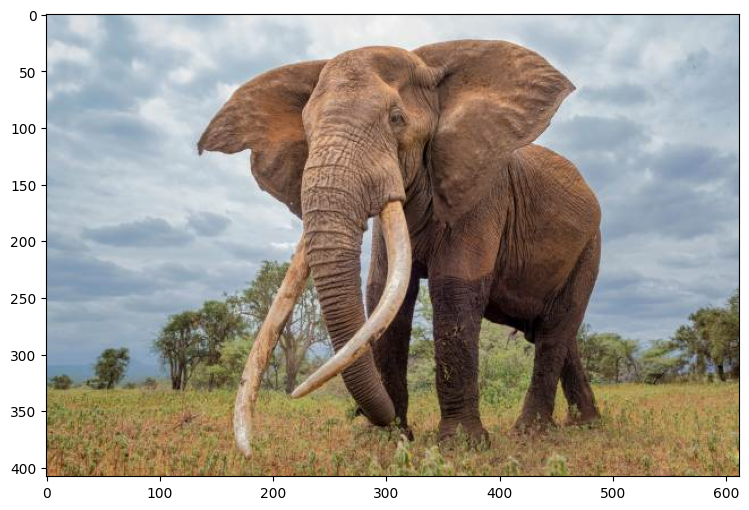

In [27]:
image_np = img[0].numpy()
plt.figure(figsize=(10, 6))
plt.imshow(image_np)
ax = plt.gca()

for i in range(len(result["detection_scores"])):
    score = float(result["detection_scores"][i])  # ✅ Robust scalar conversion
    if score < 0.5:
        continue

    box = result["detection_boxes"][i]
    class_id = int(result["detection_classes"][i])
    label = labels[class_id] if class_id < len(labels) else "N/A"

    ymin, xmin, ymax, xmax = box
    h, w, _ = image_np.shape
    left, right = xmin * w, xmax * w
    top, bottom = ymin * h, ymax * h

    ax.add_patch(plt.Rectangle(
        (left, top), right - left, bottom - top,
        edgecolor='red', facecolor='none', linewidth=2
    ))
    ax.text(
        left, top - 5,
        f"{label}: {score:.2f}",
        color='red', fontsize=9,
        backgroundcolor='white'
    )

plt.axis('off')
plt.title("Object Detection with SSD MobileNet")
plt.show()
